In [8]:
from konlpy.corpus import kobill

In [9]:
docs_ko = [kobill.open(i).read() for i in kobill.fileids()]

In [2]:
from gensim import corpora

C:\Users\KeenCat\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [1]:
import os
import csv
targetpath = "topic_modeling/cbt5_all_chatting/"
texts_ko = []
stoppos = ['Noun', 'Adjective', 'Adverb', 'KoreanParticle']
for (path, dir, files) in os.walk(targetpath):
    for filename in files:
        with open(targetpath + filename, 'r', encoding = 'utf-8') as readfile:
            reader = csv.reader(readfile)
            temp_list = []
            for r in reader:
                if len(str(r[0])) == 1:
                    continue
                if str(r[1]) not in stoppos:
                    continue
                temp = str(r[0]) + "/" + str(r[1])
                temp_list.append(temp)
        texts_ko.append(temp_list)
                

In [3]:
print(texts_ko[1])

['렙몇임/Noun', '불곰/Noun', 'ㅅㅂ/KoreanParticle', '또죽엇네/Noun', '솔직히/Adjective', '조금씩/Adverb', '뭔가/Noun', '깔끔함/Adjective', 'ㅋㅋ/KoreanParticle', '잠수/Noun', 'ㅡㅡ/KoreanParticle', '미친/Adjective', '재밌/Adjective', '죶초보/Noun', '이거엿/Noun', '시발/Noun', 'ㅡㅡ/KoreanParticle', '사양/Noun', '그렇게/Adverb', '높네/Adjective', '최저/Noun', '성능/Noun', 'ㅡㅡ/KoreanParticle', '꺄울왓당/Noun', 'ㅋㅋ/KoreanParticle', '케리/Noun', '거주/Noun', '먹음/Noun', '모기/Noun', '방물/Noun', '야야/Noun', '멧돼지/Noun', '어딧어/Noun', '시발/Noun', '지랄/Noun', '귓속말/Noun', '비애/Noun', '망햇/Noun', '그래픽/Noun', '이렇게/Adverb', '시점/Noun', '짜증/Noun', '그렇게/Adverb', '심하진/Adjective', 'ㅅㅂ/KoreanParticle', '영안/Noun', '마법/Noun', '레벨/Noun', '나안/Noun', '일일이/Noun', '필요없/Adjective', '스킬/Noun', '불곰/Noun', '디졋/Noun', '스킬/Noun', '불곰/Noun', '뒈졋/Noun', '진짜/Noun', '플레이/Noun', '지장/Noun', '언제/Noun', '배고파/Adjective', '화살표/Noun', '방향/Noun', '구만/Noun', 'ㅡㅡ/KoreanParticle', '조종/Noun', '하든/Noun', '비행기/Noun', '조종/Noun', '하든/Noun', '국적/Noun', '항아리/Noun', '사용/Noun', '하라/Noun', '묘목/Noun', '무슨/Noun',

In [69]:
from collections import defaultdict
textset = defaultdict(lambda: 0)
for text in texts_ko:
    for t in text:
        textset[t] +=1

2190


# Topic Modeling

In [4]:
from gensim import corpora
dictionary_ko = corpora.Dictionary(texts_ko)
print(dictionary_ko)
dictionary_ko.save('ko.dict')

Dictionary(85416 unique tokens: ['ㄱㄱ/KoreanParticle', 'ㅇㅇ/KoreanParticle', 'ㅋㅋ/KoreanParticle', 'ㅏㅈ/KoreanParticle', 'ㅐㅇ/KoreanParticle']...)


In [5]:
from gensim import models
tf_ko = [dictionary_ko.doc2bow(text) for text in texts_ko]
print (tf_ko[0])

[(0, 2), (1, 2), (2, 7), (3, 1), (4, 1), (5, 3), (6, 2), (7, 1), (8, 2), (9, 1), (10, 1), (11, 2), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 2), (18, 1), (19, 1), (20, 2), (21, 1), (22, 1), (23, 1), (24, 1), (25, 3), (26, 1), (27, 2), (28, 3), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 3), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 2), (43, 1), (44, 2), (45, 1), (46, 1), (47, 3), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 4), (61, 2), (62, 2), (63, 1), (64, 1), (65, 2), (66, 1), (67, 1), (68, 2), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 5), (80, 1), (81, 1), (82, 2), (83, 1), (84, 1), (85, 1), (86, 1), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1), (93, 1), (94, 1), (95, 3), (96, 2), (97, 1), (98, 1), (99, 1), (100, 1), (101, 1), (102, 1), (103, 1), (104, 1), (105, 2), (106, 1), (107, 2), (108, 2), (109, 1), (110, 1),

In [6]:
tfidf_model_ko = models.TfidfModel(tf_ko)

In [7]:
tfidf_ko = tfidf_model_ko[tf_ko]
corpora.MmCorpus.serialize('ko.mm', tfidf_ko) # save corpus to file for future use

# print first 10 elements of first document's tf-idf vector
print(tfidf_ko.corpus[0][:10])
# print top 10 elements of first document's tf-idf vector
print(sorted(tfidf_ko.corpus[0], key=lambda x: x[1], reverse=True)[:10])
# print token of most frequent element

[(0, 2), (1, 2), (2, 7), (3, 1), (4, 1), (5, 3), (6, 2), (7, 1), (8, 2), (9, 1)]
[(214, 23), (208, 10), (223, 9), (2, 7), (256, 7), (79, 5), (204, 5), (60, 4), (241, 4), (5, 3)]


In [24]:
ntopics, nwords = 3, 5
lsi_ko = models.lsimodel.LsiModel(tfidf_ko, id2word=dictionary_ko, num_topics=ntopics)
print(lsi_ko.print_topics(num_topics=ntopics, num_words=nwords))

topics = lsi_ko.print_topics(num_topics=ntopics, num_words=nwords)



[(0, '0.153*"ㅎㅎ/KoreanParticle" + 0.138*"ㅠㅠ/KoreanParticle" + 0.114*"왕궁/Noun" + 0.089*"ㅋㅋ/KoreanParticle" + 0.087*"ㄷㄷ/KoreanParticle"'), (1, '-0.417*"왕궁/Noun" + -0.223*"ㅎㅎ/KoreanParticle" + -0.218*"힐러/Noun" + -0.174*"지하/Noun" + -0.172*"보스/Noun"'), (2, '0.378*"ㅎㅎ/KoreanParticle" + -0.207*"그래픽/Noun" + 0.174*"무역/Noun" + -0.156*"블소/Noun" + -0.154*"시발/Noun"')]


In [25]:
count = 0
for t in topics:
    count = count + 1
    print('topic ' +str(count) + ' ', t)

topic 1  (0, '0.153*"ㅎㅎ/KoreanParticle" + 0.138*"ㅠㅠ/KoreanParticle" + 0.114*"왕궁/Noun" + 0.089*"ㅋㅋ/KoreanParticle" + 0.087*"ㄷㄷ/KoreanParticle"')
topic 2  (1, '-0.417*"왕궁/Noun" + -0.223*"ㅎㅎ/KoreanParticle" + -0.218*"힐러/Noun" + -0.174*"지하/Noun" + -0.172*"보스/Noun"')
topic 3  (2, '0.378*"ㅎㅎ/KoreanParticle" + -0.207*"그래픽/Noun" + 0.174*"무역/Noun" + -0.156*"블소/Noun" + -0.154*"시발/Noun"')


In [26]:
import numpy as np; np.random.seed(42)  # optional
lda_ko = models.ldamodel.LdaModel(tfidf_ko, id2word=dictionary_ko, num_topics=ntopics)
print(lda_ko.print_topics(num_topics=ntopics, num_words=nwords))

[(0, '0.001*"ㅠㅠ/KoreanParticle" + 0.001*"ㅎㅎ/KoreanParticle" + 0.001*"ㅡㅡ/KoreanParticle" + 0.001*"노동/Noun" + 0.001*"ㅋㅋ/KoreanParticle"'), (1, '0.000*"ㅎㅎ/KoreanParticle" + 0.000*"ㄷㄷ/KoreanParticle" + 0.000*"ㅠㅠ/KoreanParticle" + 0.000*"대륙/Noun" + 0.000*"ㅋㅋ/KoreanParticle"'), (2, '0.001*"왕궁/Noun" + 0.001*"ㅎㅎ/KoreanParticle" + 0.001*"ㅠㅠ/KoreanParticle" + 0.001*"보스/Noun" + 0.001*"힐러/Noun"')]


In [27]:
import numpy as np; np.random.seed(42)  # optional
hdp_ko = models.hdpmodel.HdpModel(tfidf_ko, id2word=dictionary_ko)
print(hdp_ko.print_topics(topics=ntopics, topn=nwords))

KeyboardInterrupt: 

# word 2 vec

In [18]:
from gensim.models import word2vec
wv_model_ko = word2vec.Word2Vec(texts_ko)
wv_model_ko.init_sims(replace=True)
wv_model_ko.save('ko_word2vec.model')

In [65]:
wv_model_ko.most_similar(['고려/Noun'])

C:\Users\KeenCat\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('재밌냐/Adjective', 0.9682403206825256),
 ('큰일/Noun', 0.9589104652404785),
 ('미성년/Noun', 0.9584646821022034),
 ('상식/Noun', 0.9578827619552612),
 ('부자/Noun', 0.9574700593948364),
 ('형량/Noun', 0.9571524858474731),
 ('언플/Noun', 0.9559289216995239),
 ('인물/Noun', 0.9558865427970886),
 ('어쨋/Noun', 0.9556173086166382),
 ('업뎃/Noun', 0.9551690816879272)]

# word to vec visualization

In [ ]:
c=0
word = []
for k, v in enumerate(textset.keys()):
    if textset[v] >= 100:
        c+=1
        word.append(str(v))
print (c)

In [113]:
wv_texts_ko = []

for text in texts_ko:
    temp2= []
    for t in text:
        if t not in word:
            continue
        temp2.append(t)
    wv_texts_ko.append(temp2)

In [115]:
from gensim.models import word2vec
wv_model_ko = word2vec.Word2Vec(wv_texts_ko)
wv_model_ko.init_sims(replace=True)
wv_model_ko.save('ko_word2vec_morethan_100.model')

In [116]:
import gensim
import gensim.models as g
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pandas as pd
model = g.Doc2Vec.load('ko_word2vec_morethan_100.model')

In [117]:
vocab = list(model.wv.vocab)
X = model[vocab]

tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

df = pd.DataFrame(X_tsne, index=vocab, columns=['x', 'y'])

C:\Users\KeenCat\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


AttributeError: module 'sys' has no attribute 'setdefaultencoding'

In [93]:
import matplotlib


In [102]:
from matplotlib import font_manager, rc


[]

In [107]:
font_list = font_manager.findSystemFonts(fontpaths=None, fontext='ttf')
print(font_list)

['c:\\windows\\fonts\\ngulim.ttf', 'c:\\windows\\fonts\\malgunbd.ttf', 'c:\\windows\\fonts\\bauhs93.ttf', 'C:\\WINDOWS\\Fonts\\MAGNETOB.TTF', 'c:\\windows\\fonts\\refsan.ttf', 'c:\\windows\\fonts\\courbd.ttf', 'c:\\windows\\fonts\\gillubcd.ttf', 'c:\\windows\\fonts\\h2gtre.ttf', 'c:\\windows\\fonts\\baskvill.ttf', 'c:\\windows\\fonts\\bookosi.ttf', 'c:\\windows\\fonts\\cour.ttf', 'C:\\WINDOWS\\Fonts\\calibrib.ttf', 'c:\\windows\\fonts\\itcblkad.ttf', 'c:\\windows\\fonts\\mk.ttf', 'C:\\WINDOWS\\Fonts\\comicz.ttf', 'c:\\windows\\fonts\\seguisbi.ttf', 'c:\\windows\\fonts\\alger.ttf', 'c:\\windows\\fonts\\gadugib.ttf', 'c:\\windows\\fonts\\courbi.ttf', 'C:\\WINDOWS\\Fonts\\H2MJSM.TTF', 'c:\\windows\\fonts\\ltypeb.ttf', 'C:\\WINDOWS\\Fonts\\ROCK.TTF', 'C:\\WINDOWS\\Fonts\\Candarab.ttf', 'C:\\WINDOWS\\Fonts\\H2GTRE.TTF', 'C:\\WINDOWS\\Fonts\\PLAYBILL.TTF', 'C:\\WINDOWS\\Fonts\\ARLRDBD.TTF', 'c:\\windows\\fonts\\archristy.ttf', 'C:\\WINDOWS\\Fonts\\PERBI___.TTF', 'c:\\windows\\fonts\\handotum

In [127]:
font_name = font_manager.FontProperties(fname="c:/windows/fonts/ngulim.ttf").get_name()
matplotlib.rc('font', family=font_name, size=20)

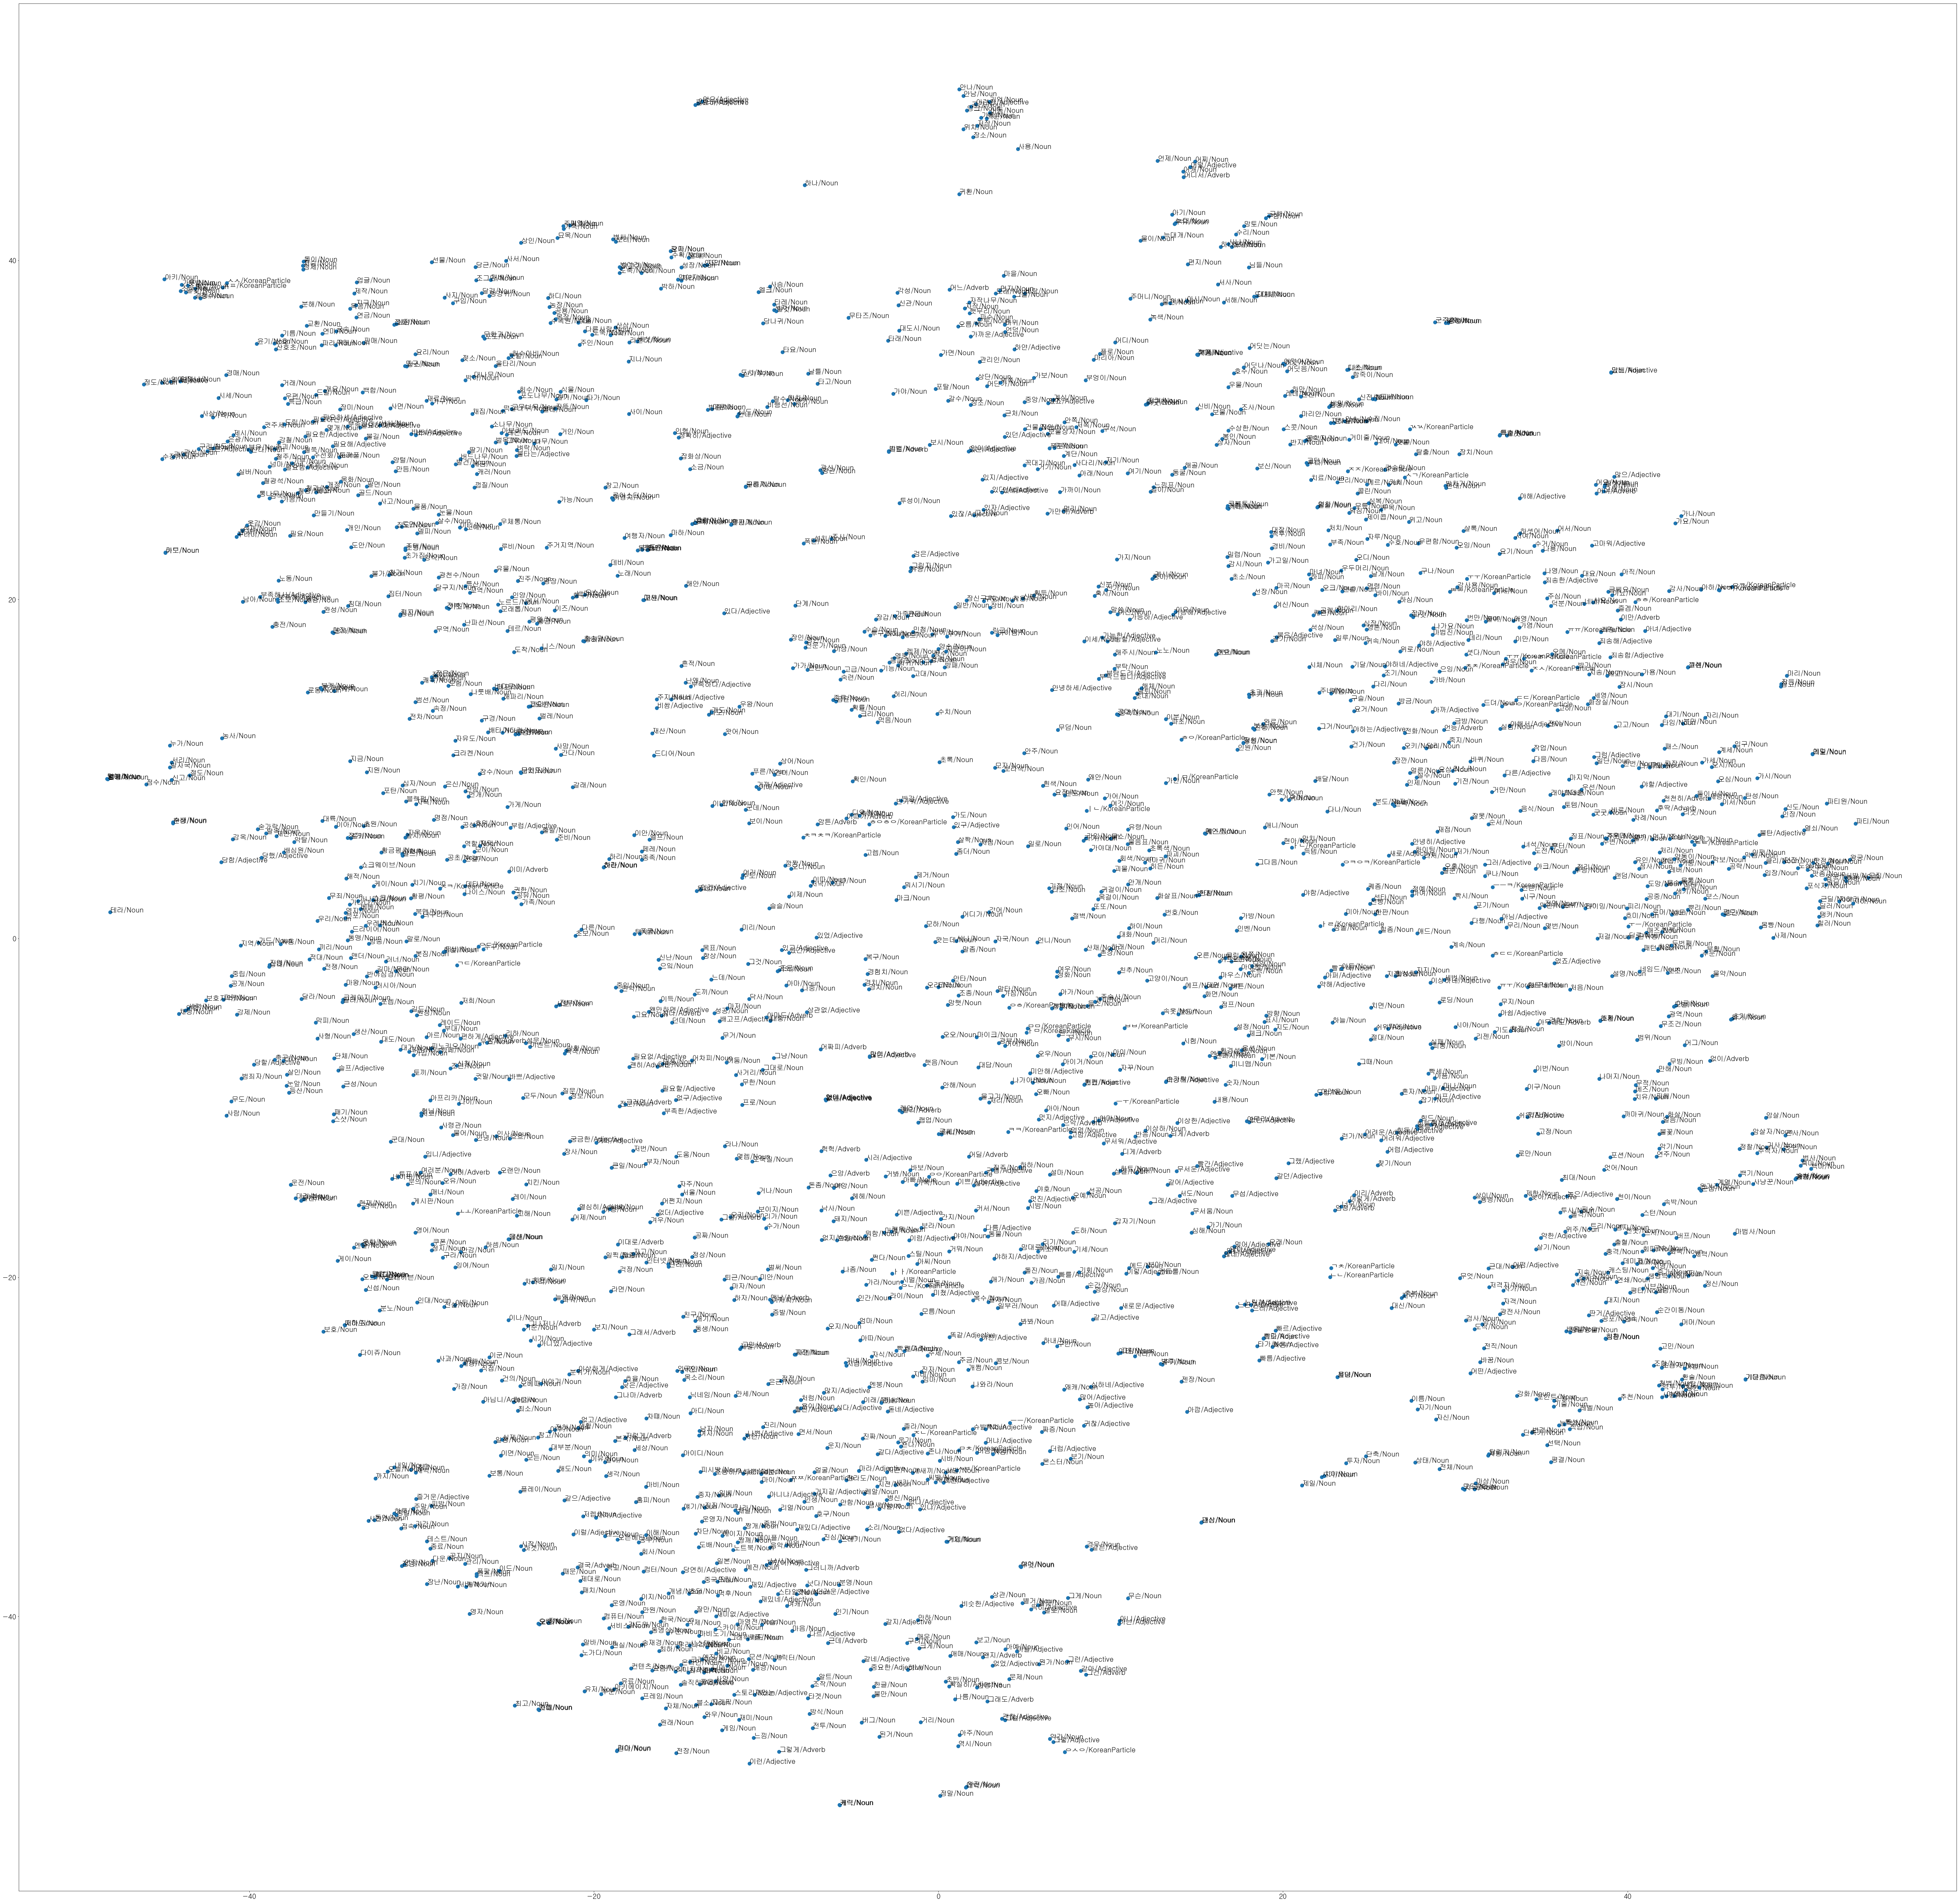

In [129]:
fig = plt.figure(figsize=(100, 100))

ax = fig.add_subplot(1, 1, 1)
ax.scatter(df['x'], df['y'], s=100)

for word, pos in df.iterrows():
    ax.annotate(word, pos)
plt.savefig('more_than_100_size100.png')
plt.show()